In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\\Projects\\Cricket (1).csv",encoding='latin1')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [9]:
df.shape

(79, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [4]:
df['HS'].value_counts()  # we should remove that 

119*    3
145     3
120*    3
131*    3
169     2
       ..
124     1
134*    1
130     1
159     1
156     1
Name: HS, Length: 62, dtype: int64

# Preprocessing of the data

1. Handling missing values -- NO missing values found
2. Handling outliers -- Not much outliers.
3. Encoding - not requierd but need to fix one feature...which is showing object. 
4. Imbalance dataset handling not required. 
5. Feature scaling --- A must step else it will take a lot of time to calculate the distance.WIll be done after the EDA process is over.

In [5]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [6]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [8]:
df['HS-Num'] = df['HS'].str.extract('(\d+)')
df['HS-Num']

0     200
1     169
2     164
3     189
4     144
     ... 
74    133
75     96
76    120
77    156
78    112
Name: HS-Num, Length: 79, dtype: object

In [ ]:
# HS column had a * sign due to which it was coming as object. So we will convert it to numeric format. 

In [12]:
df['HS-Num'] = pd.to_numeric(df['HS-Num'],errors='coerce',downcast='integer')
df['HS-Num'] 

0     200
1     169
2     164
3     189
4     144
     ... 
74    133
75     96
76    120
77    156
78    112
Name: HS-Num, Length: 79, dtype: int16

In [13]:
df.head(1)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,trial,HS-Num
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,200*,200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  trial   79 non-null     object 
 14  HS-Num  79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [14]:
# Will delete other HS and trail....

df.drop(columns = ['trial','HS'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  HS-Num  79 non-null     int16  
dtypes: float64(2), int16(1), int64(8), object(2)
memory usage: 7.7+ KB


# Exploratory Data Analysis

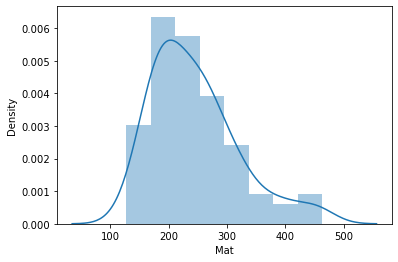

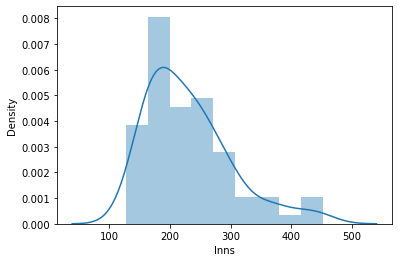

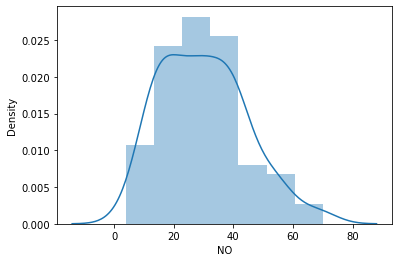

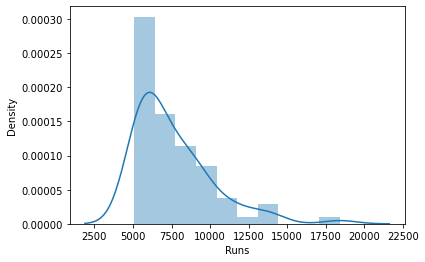

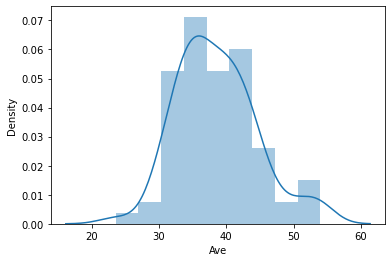

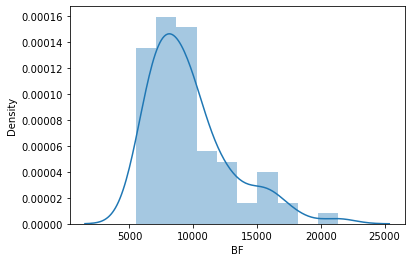

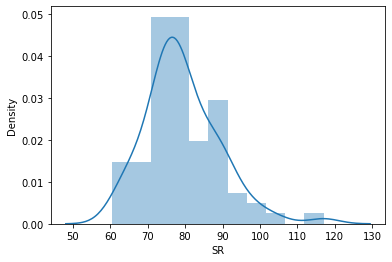

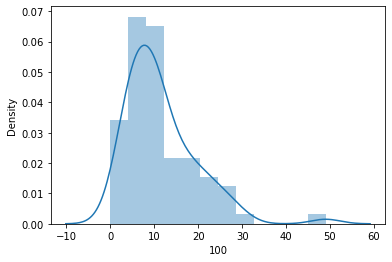

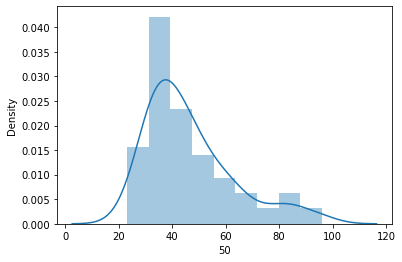

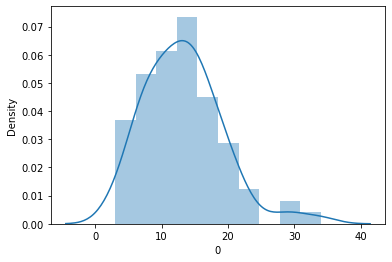

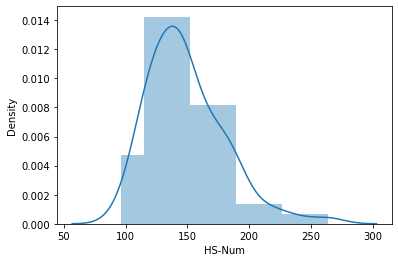

In [15]:
def dist(col):
    sns.distplot(df[col])
    plt.show()
    
for i in df.select_dtypes(exclude='object').columns:
    dist(i)

In [17]:
df.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'HS-Num'],
      dtype='object')

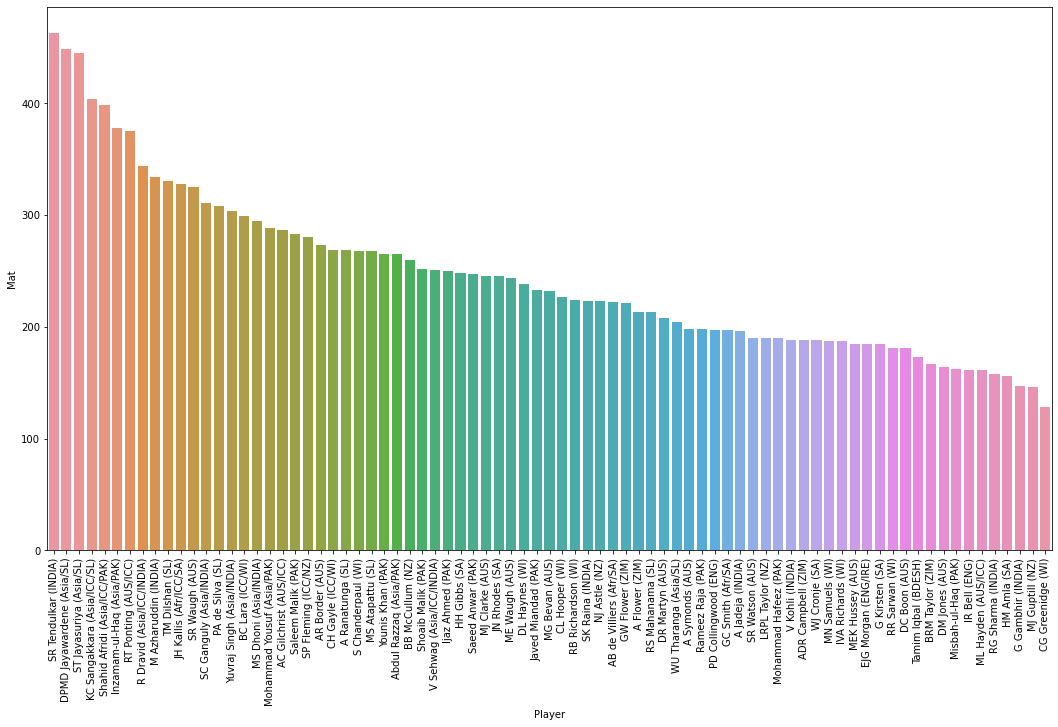

In [35]:
a1 = df[['Player','Mat']]
a1.sort_values(by='Mat',inplace=True,ascending=False)
# print(a1)
plt.figure(figsize=(18,10))
sns.barplot(a1['Player'],a1['Mat'])
plt.xticks(rotation=90)
plt.show()

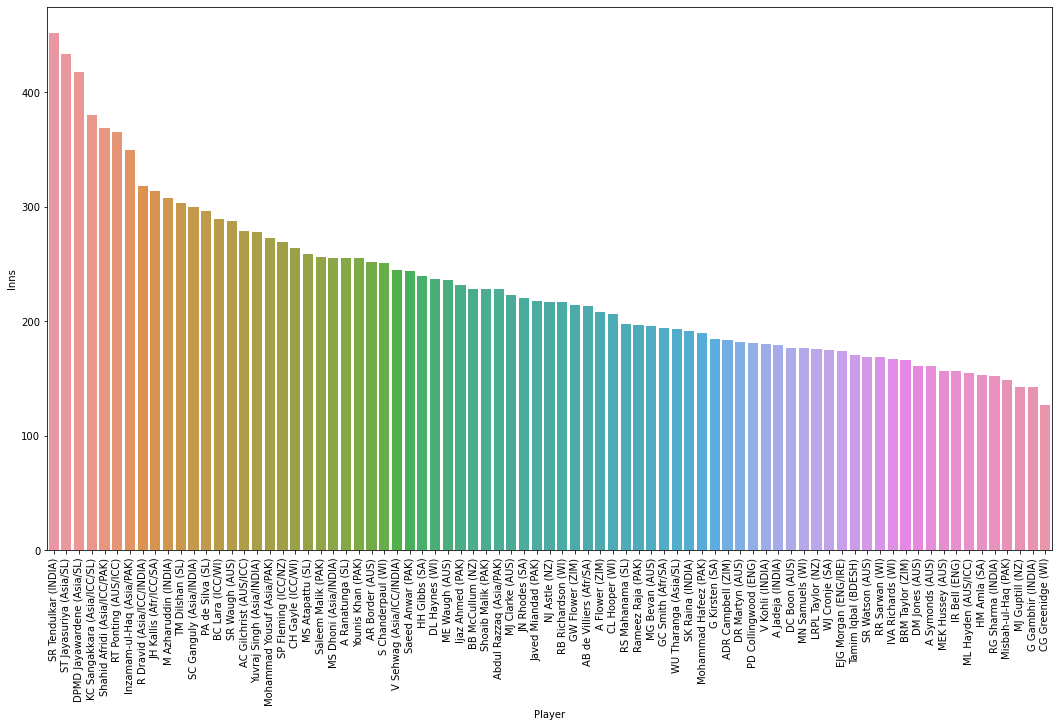

In [36]:
a1 = df[['Player','Inns']]
a1.sort_values(by='Inns',inplace=True,ascending=False)
# print(a1)
plt.figure(figsize=(18,10))
sns.barplot(a1['Player'],a1['Inns'])
plt.xticks(rotation=90)
plt.show()

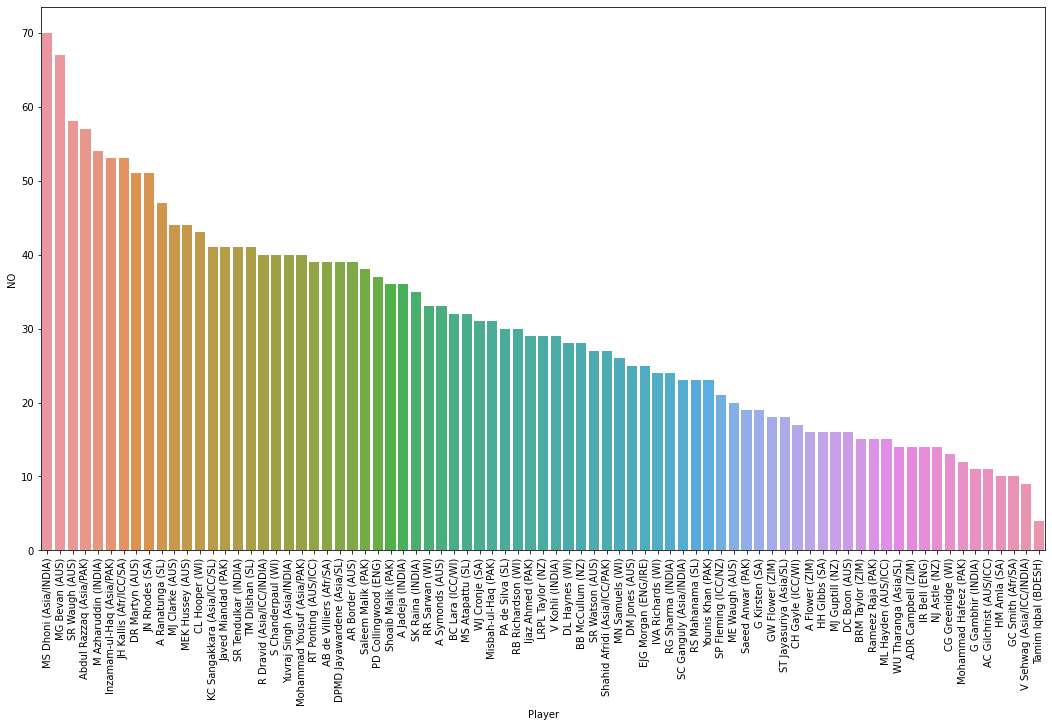

In [39]:
a1 = df[['Player','NO']]
a1.sort_values(by='NO',inplace=True,ascending=False)
# print(a1)
plt.figure(figsize=(18,10))
sns.barplot(a1['Player'],a1['NO'])
plt.xticks(rotation=90)
plt.show()

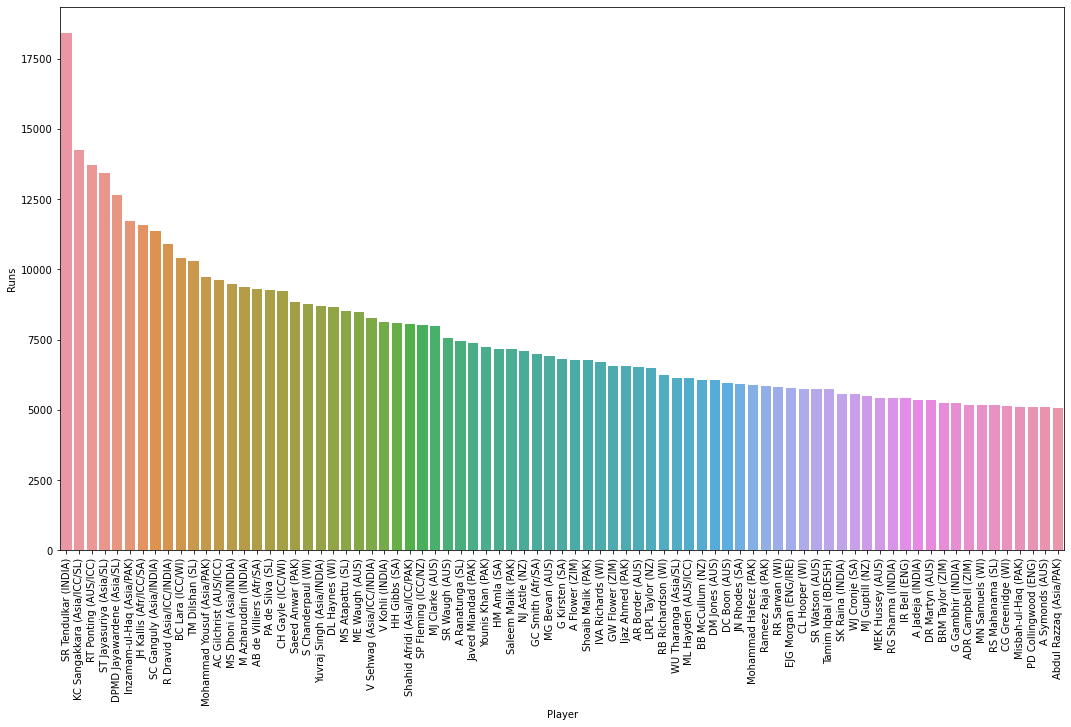

In [40]:
a1 = df[['Player','Runs']]
a1.sort_values(by='Runs',inplace=True,ascending=False)
# print(a1)
plt.figure(figsize=(18,10))
sns.barplot(a1['Player'],a1['Runs'])
plt.xticks(rotation=90)
plt.show()

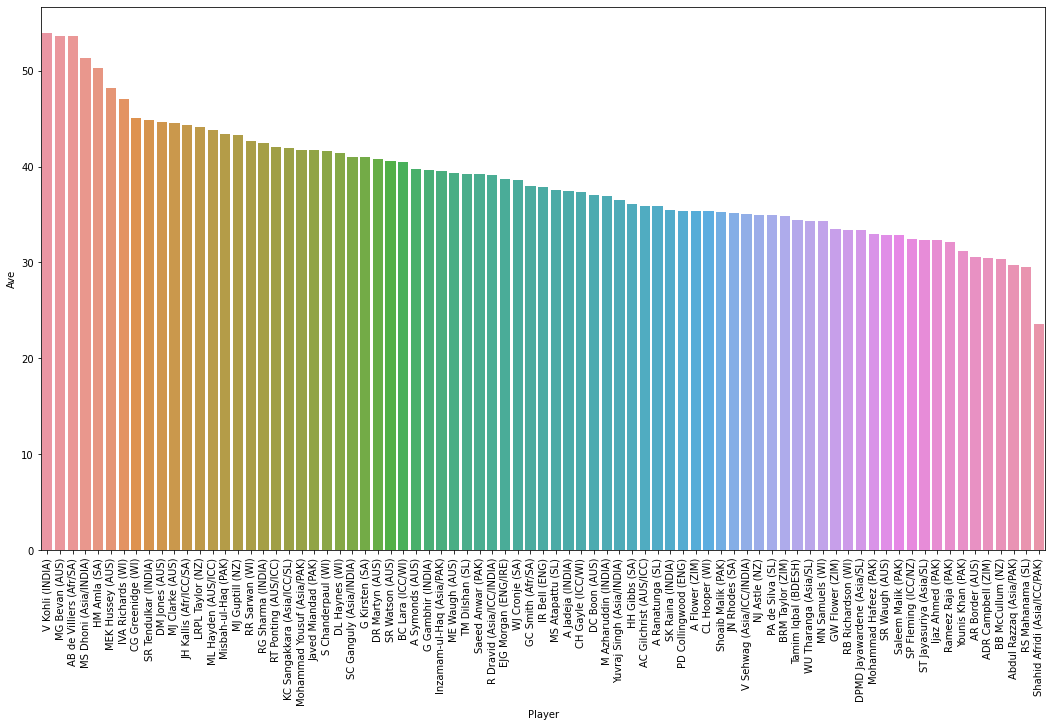

In [41]:
a1 = df[['Player','Ave']]
a1.sort_values(by='Ave',inplace=True,ascending=False)
# print(a1)
plt.figure(figsize=(18,10))
sns.barplot(a1['Player'],a1['Ave'])
plt.xticks(rotation=90)
plt.show()

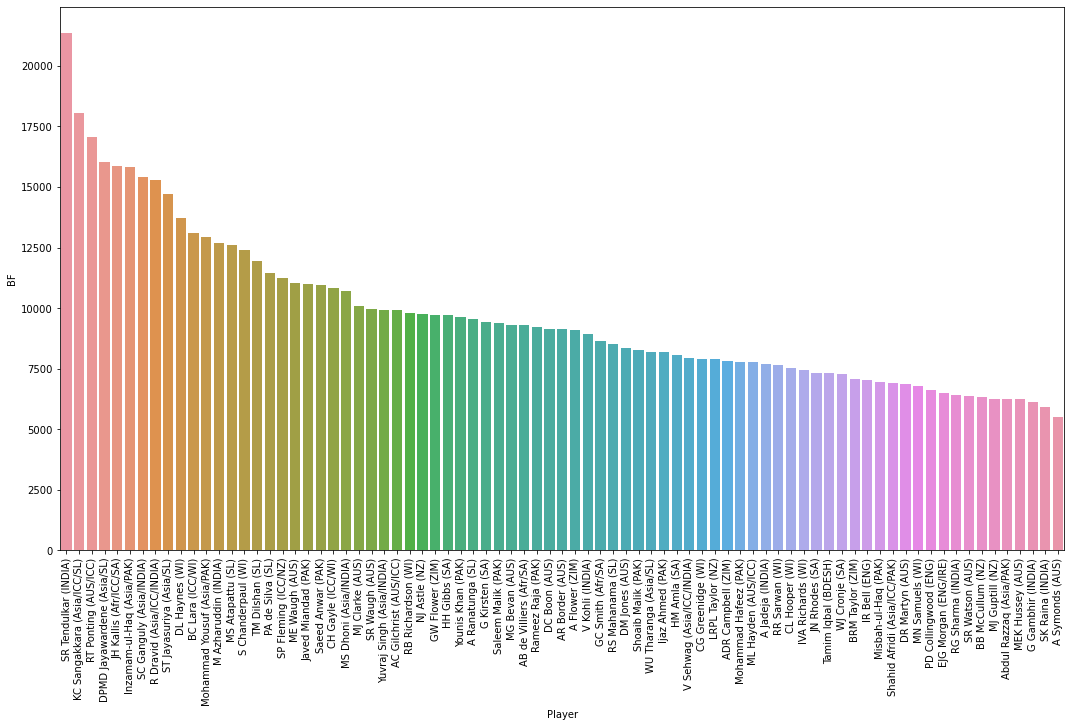

In [42]:
a1 = df[['Player','BF']]
a1.sort_values(by='BF',inplace=True,ascending=False)
# print(a1)
plt.figure(figsize=(18,10))
sns.barplot(a1['Player'],a1['BF'])
plt.xticks(rotation=90)
plt.show()

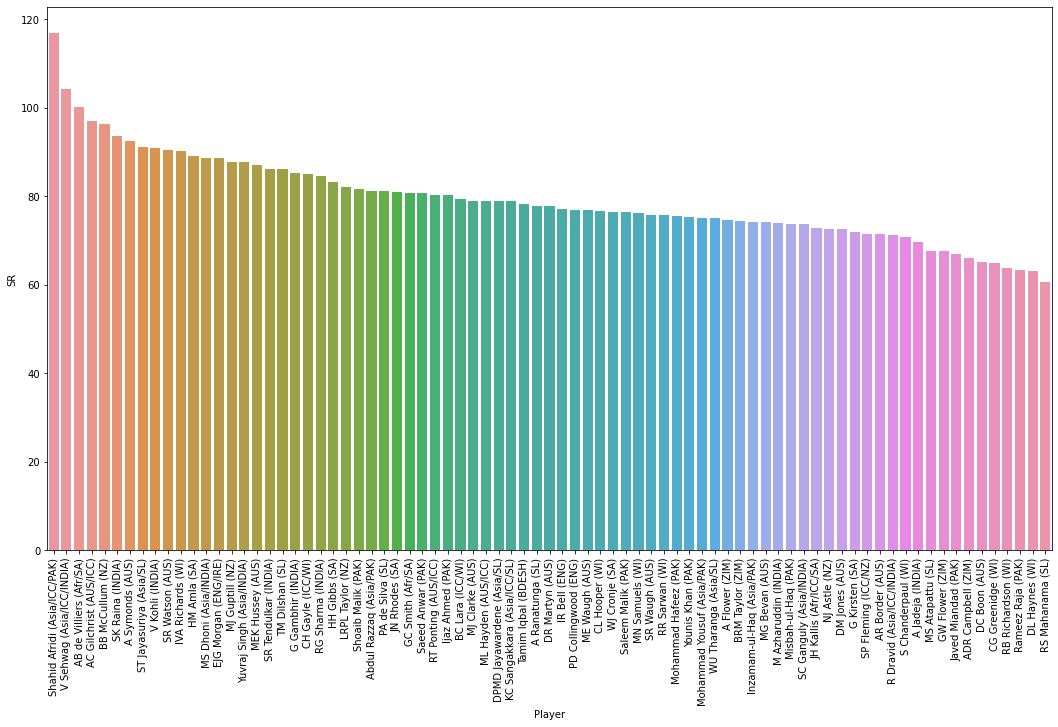

In [43]:
a1 = df[['Player','SR']]
a1.sort_values(by='SR',inplace=True,ascending=False)
# print(a1)
plt.figure(figsize=(18,10))
sns.barplot(a1['Player'],a1['SR'])
plt.xticks(rotation=90)
plt.show()

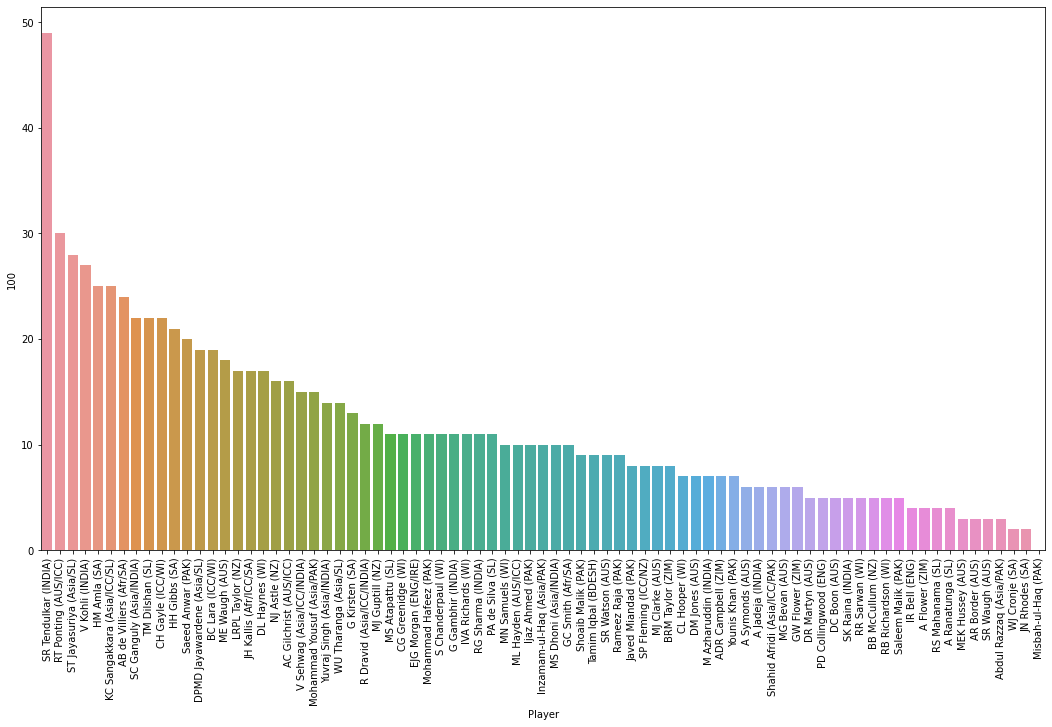

In [44]:
a1 = df[['Player','100']]
a1.sort_values(by='100',inplace=True,ascending=False)
# print(a1)
plt.figure(figsize=(18,10))
sns.barplot(a1['Player'],a1['100'])
plt.xticks(rotation=90)
plt.show()

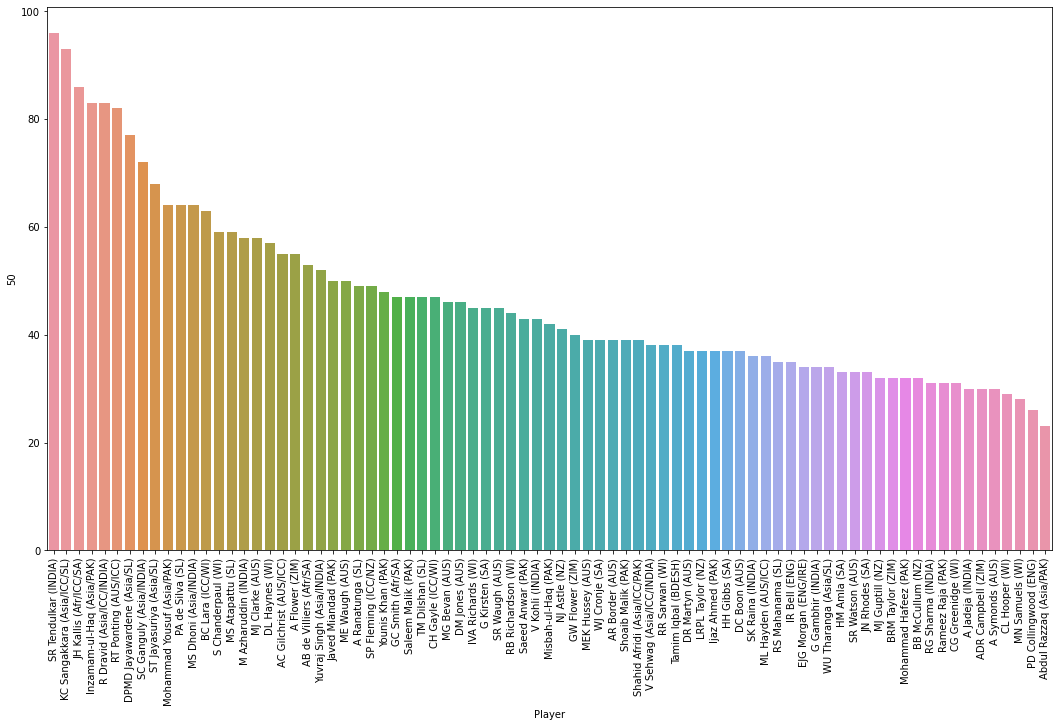

In [45]:
a1 = df[['Player','50']]
a1.sort_values(by='50',inplace=True,ascending=False)
# print(a1)
plt.figure(figsize=(18,10))
sns.barplot(a1['Player'],a1['50'])
plt.xticks(rotation=90)
plt.show()

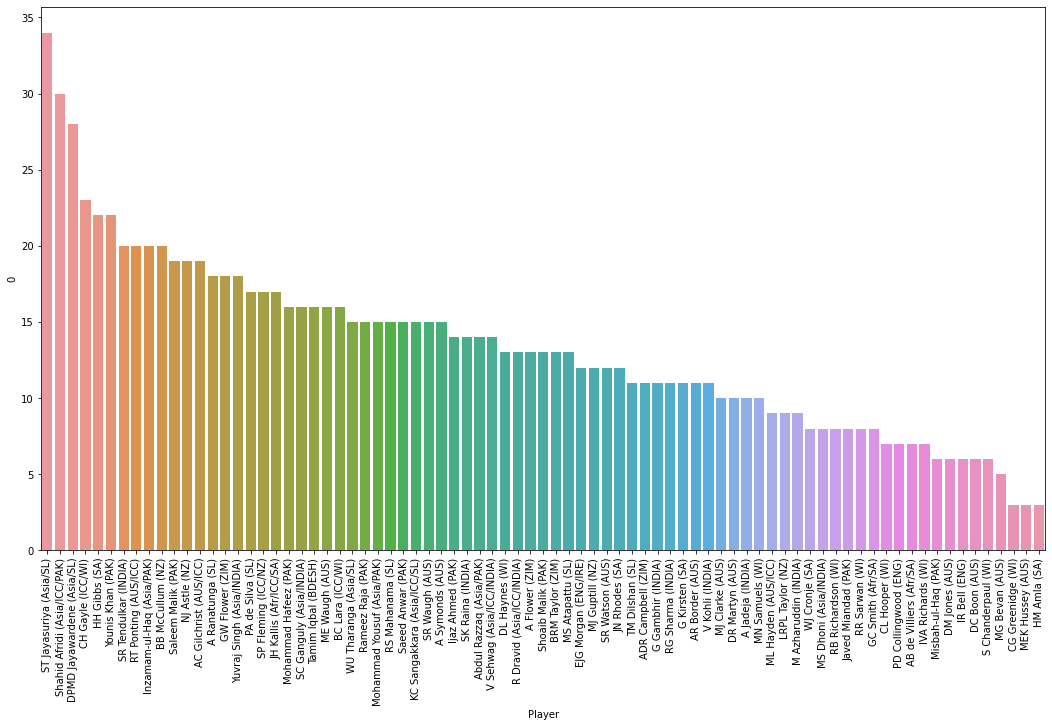

In [46]:
a1 = df[['Player','0']]
a1.sort_values(by='0',inplace=True,ascending=False)
# print(a1)
plt.figure(figsize=(18,10))
sns.barplot(a1['Player'],a1['0'])
plt.xticks(rotation=90)
plt.show()

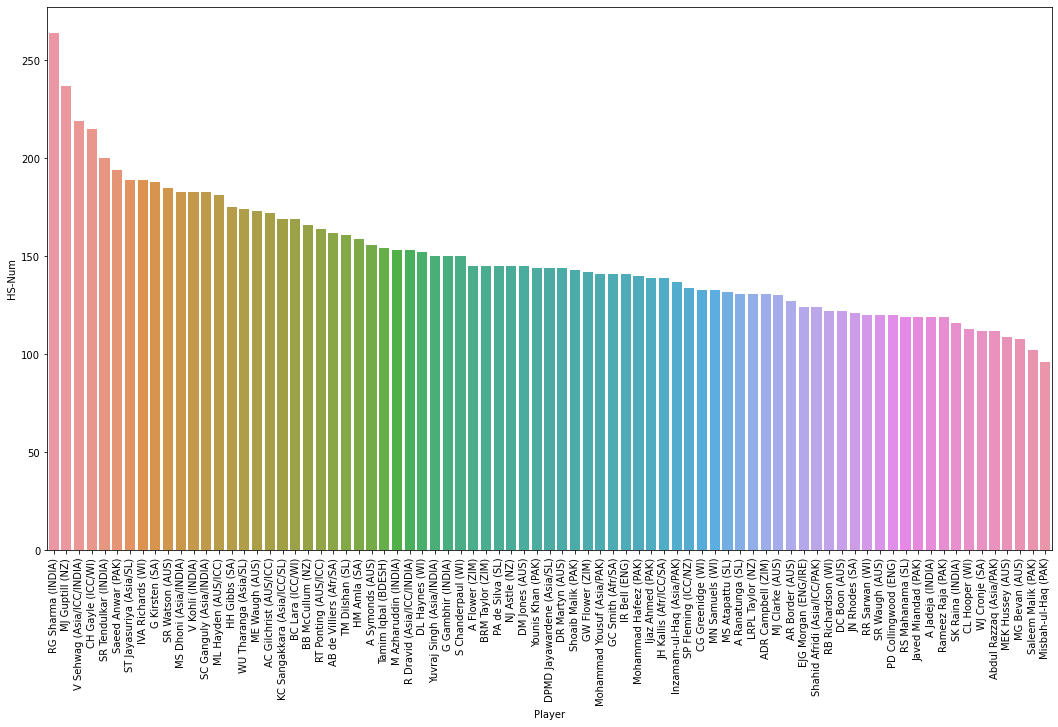

In [47]:
a1 = df[['Player','HS-Num']]
a1.sort_values(by='HS-Num',inplace=True,ascending=False)
# print(a1)
plt.figure(figsize=(18,10))
sns.barplot(a1['Player'],a1['HS-Num'])
plt.xticks(rotation=90)
plt.show()

So, we see how various players have perfromed in different features. 

# MODEL BUILDING

In [50]:
# 1. feature Scaling
df1 = df.iloc[:,2:]
from sklearn.preprocessing import StandardScaler

sc  =StandardScaler()
scx= sc.fit_transform(df1)
scx

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.07229395e+00,  3.68121424e+00,
         7.03151526e-01,  4.65672622e+00,  3.05005720e+00,
         1.14583653e+00,  1.63244320e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  5.87724608e-01,  2.63538469e+00,
        -4.41394951e-02,  1.67188751e+00,  2.86541772e+00,
         2.96670622e-01,  6.35223595e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  5.96225824e-01,  2.31965067e+00,
         1.10996904e-01,  2.29372891e+00,  2.18840630e+00,
         1.14583653e+00,  4.74381724e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00, -1.04790945e+00,  1.58829472e+00,
         1.20709133e+00,  2.04499235e+00,  1.32675540e+00,
         3.52350108e+00,  1.27859108e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.25396797e-01,
         1.98442984e+00, -8.76184872e-01,  1.99635416e+00,
  

In [51]:
from sklearn.cluster import KMeans

In [62]:
wcss = []

for i in range(2,30):
    kmeans = KMeans(n_clusters=i,random_state=101)
    kmeans.fit(scx)
    wcss.append(kmeans.inertia_)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


<AxesSubplot:>

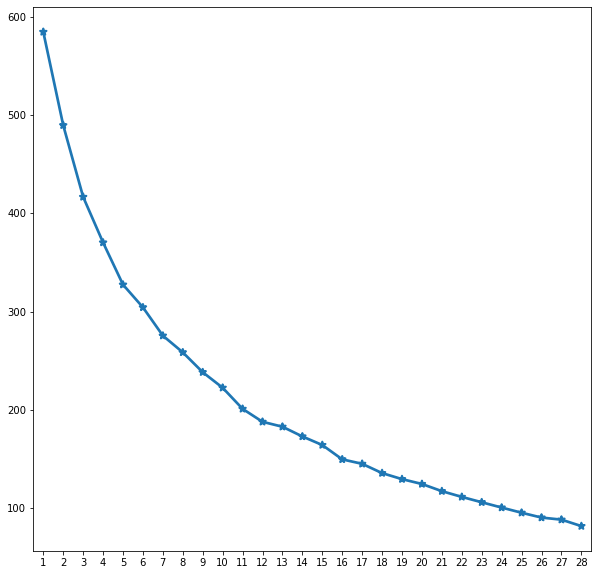

In [65]:
abc = list(range(1,29)) #,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
print(abc)
plt.figure(figsize = (10,10))
sns.pointplot(x=abc,y=wcss,markers='*')

In [66]:
kmeans = KMeans(n_clusters=11,random_state=101)
y_pred = kmeans.fit_predict(scx)
y_pred

array([ 4,  4,  4,  4,  4,  3,  3,  1,  3,  1,  1,  1,  6,  7,  1, 10,  1,
        6,  6,  1,  1,  1,  1,  6,  0, 10,  6,  9,  6,  1,  8,  8,  2,  6,
       10,  8,  6,  5,  7,  0,  5,  8,  0,  5,  8,  8,  2,  2,  5,  0,  8,
        2,  2,  8,  5,  5,  2,  5,  2,  0,  5,  8,  2,  0,  2,  0,  5,  2,
        2,  5,  5,  5,  5,  5,  2,  2,  2,  0,  8])

In [67]:
df["Cluster"] = y_pred

In [68]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,HS-Num,Cluster
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,44.83,21367,86.23,49,96,20,200,4
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,41.98,18048,78.86,25,93,15,169,4
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,42.03,17046,80.39,30,82,20,164,4
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,32.36,14725,91.20,28,68,34,189,4
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,33.37,16020,78.96,19,77,28,144,4


In [117]:
clus = df[['Player','Cluster']]
clus1 = []
clus1 = pd.DataFrame(np.where(df['Cluster']==0,df['Player'],np.nan))
clus1.dropna(inplace=True)
# clus1.drop(['Index'],axis=1,inplace=True)
clus1.rename(columns={0:'Player'},inplace=True)
clus1
c1 = clus1.merge(df,on='Player')
c1

,Player,Span,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,HS-Num,Cluster
0,V Sehwag (Asia/ICC/INDIA),1999-2013,251,245,9,8273,35.05,7929,104.33,15,38,14,219,0
1,G Kirsten (SA),1993-2003,185,185,19,6798,40.95,9436,72.04,13,45,11,188,0
2,IVA Richards (WI),1975-1991,187,167,24,6721,47.00,7451,90.20,11,45,7,189,0
3,ML Hayden (AUS/ICC),1993-2008,161,155,15,6133,43.80,7767,78.96,10,36,9,181,0
4,SR Watson (AUS),2002-2015,190,169,27,5757,40.54,6365,90.44,9,33,12,185,0
5,MJ Guptill (NZ),2009-2017,146,143,16,5500,43.30,6269,87.73,12,32,12,237,0
6,RG Sharma (INDIA),2007-2017,158,152,24,5435,42.46,6427,84.56,11,31,11,264,0
7,A Symonds (AUS),1998-2009,198,161,33,5088,39.75,5504,92.44,6,30,15,156,0


In [132]:
for i in range(10):
    name = 'clus'+str(i)
    dfname = 'c'+str(i)
    name = []
    name = pd.DataFrame(np.where(df['Cluster']==i,df['Player'],np.nan))
    name.dropna(inplace=True)
    name.rename(columns={0:'Player'},inplace=True)
    dfname = name.merge(df,on='Player')
    print("*******************   CLuster -",i,"   *******************")
    print("*******************  Cluster Count - ",len(dfname),"   *******************")
    print("*******************  Average Runs - ",round(np.mean(dfname['Runs']),2),"   *******************")
    print("*******************  Average of all averages - ",round(np.mean(dfname['Ave']),2),"   *******************")
    print("*******************  Average Runs - ",round(np.mean(dfname['BF']),2),"   *******************")
    print("\n")
    print(dfname)
    print("\n")

*******************   CLuster - 0    *******************
*******************  Cluster Count -  8    *******************
*******************  Average Runs -  6213.12    *******************
*******************  Average of all averages -  41.61    *******************
*******************  Average Runs -  7143.5    *******************


                      Player       Span  Mat  Inns  NO  Runs    Ave    BF  \
0  V Sehwag (Asia/ICC/INDIA)  1999-2013  251   245   9  8273  35.05  7929   
1             G Kirsten (SA)  1993-2003  185   185  19  6798  40.95  9436   
2          IVA Richards (WI)  1975-1991  187   167  24  6721  47.00  7451   
3        ML Hayden (AUS/ICC)  1993-2008  161   155  15  6133  43.80  7767   
4            SR Watson (AUS)  2002-2015  190   169  27  5757  40.54  6365   
5            MJ Guptill (NZ)  2009-2017  146   143  16  5500  43.30  6269   
6          RG Sharma (INDIA)  2007-2017  158   152  24  5435  42.46  6427   
7            A Symonds (AUS)  1998-2009  198   161

*******************   CLuster - 0    *******************
*******************  Cluster Count -  8    *******************
*******************  Average Runs -  6213.12    *******************
*******************  Average of all averages -  41.61    *******************
*******************  Average Runs -  7143.5    *******************




*******************   CLuster - 1    *******************
*******************  Cluster Count -  11    *******************
*******************  Average Runs -  9370.64    *******************
*******************  Average of all averages -  39.63    *******************
*******************  Average Runs -  12384.18    *******************




*******************   CLuster - 2    *******************
*******************  Cluster Count -  14    *******************
*******************  Average Runs -  5769.43    *******************
*******************  Average of all averages -  40.55    *******************
*******************  Average Runs -  7925.79    *******************




*******************   CLuster - 3    *******************
*******************  Cluster Count -  3    *******************
*******************  Average Runs -  11402.33    *******************
*******************  Average of all averages -  41.01    *******************
*******************  Average Runs -  15660.33    *******************




*******************   CLuster - 4    *******************
*******************  Cluster Count -  5    *******************
*******************  Average Runs -  14488.8    *******************
*******************  Average of all averages -  38.91    *******************
*******************  Average Runs -  17441.2    *******************




*******************   CLuster - 5    *******************
*******************  Cluster Count -  14    *******************
*******************  Average Runs -  5796.93    *******************
*******************  Average of all averages -  34.71    *******************
*******************  Average Runs -  7847.79    *******************




*******************   CLuster - 6    *******************
*******************  Cluster Count -  8    *******************
*******************  Average Runs -  8329.25    *******************
*******************  Average of all averages -  35.81    *******************
*******************  Average Runs -  10387.25    *******************




*******************   CLuster - 7    *******************
*******************  Cluster Count -  2    *******************
*******************  Average Runs -  8204.0    *******************
*******************  Average of all averages -  52.45    *******************
*******************  Average Runs -  10013.0    *******************




*******************   CLuster - 8    *******************
*******************  Cluster Count -  10    *******************
*******************  Average Runs -  6471.4    *******************
*******************  Average of all averages -  33.05    *******************
*******************  Average Runs -  8034.9    *******************




*******************   CLuster - 9    *******************
*******************  Cluster Count -  1    *******************
*******************  Average Runs -  8064.0    *******************
*******************  Average of all averages -  23.57    *******************
*******************  Average Runs -  6892.0    *******************



# Done